This colab loads the raw dataset and prepares it for input into a machine learning classifier. The following transformation steps are taken:

*   Remove all rows with Country set to NaN
*   Remove all rows with an question response not in {1,2,3,4,5}
*   Remove all rows with countries that have less than 5,000 responses
*   Reencode all postive and negative response to the (-2,2) scale

The transformed/saved dataset is saved back to Google Drive so the above steps don't need to be repeated


# Packages

In [0]:
import pandas as pd
import numpy as np
import os

from google.colab import drive
from google.colab import files

from sklearn.decomposition import PCA

import matplotlib.pyplot as plt 

# Read in Data

In [0]:
drive.mount('/content/drive/', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
data = pd.read_csv('/content/drive/My Drive/Data Mining Assignment/data/IPIP-FFM-data-8Nov2018/data-final.csv', sep = '\t')
print(data.shape)
data.head()

(1015341, 110)


EXT1  EXT2  EXT3  ...  country  lat_appx_lots_of_err  long_appx_lots_of_err
0   4.0   1.0   5.0  ...       GB               51.5448                 0.1991
1   3.0   5.0   3.0  ...       MY                3.1698                101.706
2   2.0   3.0   4.0  ...       GB               54.9119                -1.3833
3   2.0   2.0   2.0  ...       GB                 51.75                  -1.25
4   3.0   3.0   3.0  ...       KE                   1.0                   38.0

[5 rows x 110 columns]

# Remove NaN/'None' Countries

In [0]:
country_nan_index = data[data['country'].isnull()].index.tolist()
print(len(country_nan_index))

country_none_index = data.index[data['country'] == 'NONE'].tolist()
print(len(country_none_index))

invlaid_country_indexes = country_nan_index + country_none_index
len(invlaid_country_indexes)

77
13728


13805

Drop the None/NaN Indexes from the data

In [0]:
data_transformed = data.drop(index=invlaid_country_indexes)
data_transformed = data_transformed.reset_index(drop=True)
print(data_transformed.shape)

print(len(data.index) - len(data_transformed.index) == len(invlaid_country_indexes))
max(data_transformed.index)

(1001536, 110)
True


1001535

# Remove Any Rows with Invalid Rows to Questions

In [0]:
data_missing_values = pd.DataFrame({'column_name' : data_transformed.columns,
                                    'invalid_values_count' : np.repeat(np.nan, len(data_transformed.columns)),
                                    'invalid_values' : np.repeat(np.nan, len(data_transformed.columns)),
                                    'invalid_rows_count' : np.repeat(np.nan, len(data_transformed.columns)),
                                    'invalid_rows' : np.repeat(np.nan, len(data_transformed.columns)),
                                    'null_rows_count' : np.repeat(np.nan, len(data_transformed.columns)),
                                    'null_rows' : np.repeat(np.nan, len(data_transformed.columns))
                                    })

In [0]:
data_columns = data_transformed.columns
acceptable_values = [1,2,3,4,5]
#for col_ind in range(len(data_missing_values.index)):
for col_ind in range(110):
  col_name = data_columns[col_ind]
  unique_values = pd.unique(data_transformed[col_name])
  if col_ind > 49:
    print(col_name)
    null_rows = data_transformed[data_transformed[col_name].isnull()].index.tolist()
    print(len(null_rows))
    if len(null_rows) > 0:
      data_missing_values.iloc[col_ind, data_missing_values.columns.get_loc('null_rows_count')] = len(null_rows)
      data_missing_values.iloc[col_ind, data_missing_values.columns.get_loc('null_rows')] = ','.join(map(str, null_rows))
    else:
      data_missing_values.iloc[col_ind, data_missing_values.columns.get_loc('null_rows_count')] = 0
  else:
    invalid_values = set(unique_values).difference(acceptable_values)
    if len(invalid_values) > 0:
      data_missing_values.iloc[col_ind, data_missing_values.columns.get_loc('invalid_values_count')] = len(invalid_values)
      data_missing_values.iloc[col_ind, data_missing_values.columns.get_loc('invalid_values')] = ','.join(map(str, invalid_values))
      invalid_rows = data_transformed.index[data_transformed[col_name].isin(invalid_values)]
      data_missing_values.iloc[col_ind, data_missing_values.columns.get_loc('invalid_rows_count')] = len(list(invalid_rows))
      data_missing_values.iloc[col_ind, data_missing_values.columns.get_loc('invalid_rows')] = ','.join(map(str, list(invalid_rows)))
      null_rows = data_transformed[data_transformed[col_name].isnull()].index.tolist()
      data_missing_values.iloc[col_ind, data_missing_values.columns.get_loc('null_rows_count')] = len(null_rows)
      data_missing_values.iloc[col_ind, data_missing_values.columns.get_loc('null_rows')] = ','.join(map(str, null_rows))
    else:
      data_missing_values.iloc[col_ind, data_missing_values.columns.get_loc('invalid_values_count')] = 0



In [0]:
data_missing_values.head(105)

column_name  ...                                          null_rows
0           EXT1  ...  78073,78132,78167,151597,151599,151600,151602,...
1           EXT2  ...  78073,78132,78167,151597,151599,151600,151602,...
2           EXT3  ...  78073,78132,78167,151597,151599,151600,151602,...
3           EXT4  ...  78073,78132,78167,151597,151599,151600,151602,...
4           EXT5  ...  78073,78132,78167,151597,151599,151600,151602,...
..           ...  ...                                                ...
100     dateload  ...                                                NaN
101      screenw  ...  123808,151614,151617,151618,151621,151625,1516...
102      screenh  ...  123808,151614,151617,151618,151621,151625,1516...
103  introelapse  ...  123808,151614,151617,151618,151621,151625,1516...
104   testelapse  ...  78073,78132,78167,151597,151599,151600,151602,...

[105 rows x 7 columns]

In [0]:
all_invalid_rows = data_missing_values['null_rows'].dropna().values.tolist() + data_missing_values['invalid_rows'].dropna().values.tolist()
all_null_rows_str = ','.join(map(str, all_invalid_rows))
unique_null_rows = list(set(all_null_rows_str.split(',')))
unique_null_rows = [float(x) for x in unique_null_rows]
data_transformed.loc[unique_null_rows]
#data_transformed.loc[227]['EXT1']

EXT1  EXT2  ...  lat_appx_lots_of_err  long_appx_lots_of_err
407416.0   4.0   2.0  ...               39.7379               -104.985
937699.0   4.0   2.0  ...               40.6308               -74.5122
598339.0   1.0   5.0  ...                  38.0                  -97.0
802538.0   2.0   2.0  ...               10.8742               125.0025
191667.0   3.0   0.0  ...               38.0161               -84.6059
...        ...   ...  ...                   ...                    ...
949584.0   1.0   4.0  ...                  38.0                  -97.0
270862.0   1.0   4.0  ...                 -41.0                  174.0
705255.0   2.0   3.0  ...              -31.9428               115.8439
603243.0   4.0   0.0  ...                 48.86                   2.35
394620.0   3.0   3.0  ...               53.3478                -6.2597

[140014 rows x 110 columns]

Drop all rows which contain invalid answers

In [0]:
print(data_transformed.shape)
print(unique_null_rows)
data_transformed_2 = data_transformed.drop(index = unique_null_rows)
data_transformed_2 = data_transformed_2.reset_index(drop = True)
print(data_transformed.shape)
print(data_transformed_2.shape)

(1001536, 110)
[407416.0, 937699.0, 598339.0, 802538.0, 191667.0, 160732.0, 531601.0, 319475.0, 811853.0, 127543.0, 451127.0, 301864.0, 113830.0, 318943.0, 534948.0, 779621.0, 899238.0, 912234.0, 831656.0, 605990.0, 653445.0, 41823.0, 33800.0, 512268.0, 442728.0, 669553.0, 340380.0, 43406.0, 956629.0, 322095.0, 98619.0, 376038.0, 514512.0, 220841.0, 292028.0, 48522.0, 232256.0, 388995.0, 669053.0, 167740.0, 950799.0, 374322.0, 246112.0, 90536.0, 145826.0, 783443.0, 448122.0, 933755.0, 999079.0, 729670.0, 791131.0, 233768.0, 85653.0, 278894.0, 477662.0, 914198.0, 771729.0, 662137.0, 346520.0, 693284.0, 420405.0, 740568.0, 697251.0, 448679.0, 140267.0, 55601.0, 709841.0, 171911.0, 73130.0, 264719.0, 475489.0, 936724.0, 805998.0, 77730.0, 360598.0, 854961.0, 222170.0, 760314.0, 288333.0, 429969.0, 408623.0, 514489.0, 637726.0, 338660.0, 438140.0, 288146.0, 15696.0, 25288.0, 962850.0, 886654.0, 264006.0, 523879.0, 348088.0, 135245.0, 309684.0, 684425.0, 542301.0, 569540.0, 649445.0, 37166.

Re Run and Check for Nan values in other columns

In [0]:
data_missing_values = pd.DataFrame({'column_name' : data_transformed.columns,
                                    'null_rows_count' : np.repeat(np.nan, len(data_transformed.columns)),
                                    'null_rows' : np.repeat(np.nan, len(data_transformed.columns))
                                    })

In [0]:
data_columns = data_transformed_2.columns
for col_ind in range(len(data_columns)):
  col_name = data_columns[col_ind]
  null_rows = data_transformed_2[data_transformed_2[col_name].isnull()].index.tolist()
  if len(null_rows) > 0:
    data_missing_values.iloc[col_ind, data_missing_values.columns.get_loc('null_rows_count')] = len(null_rows)
    data_missing_values.iloc[col_ind, data_missing_values.columns.get_loc('null_rows')] = ','.join(map(str, null_rows))
  else:
    data_missing_values.iloc[col_ind, data_missing_values.columns.get_loc('null_rows_count')] = 0

In [0]:
print(data_missing_values.head(110))
null_counts = data_missing_values['null_rows_count'].values
print(sum(data_missing_values['null_rows_count'].values))
data_missing_values.loc[null_counts > 0]


               column_name  null_rows_count  null_rows
0                     EXT1              0.0        NaN
1                     EXT2              0.0        NaN
2                     EXT3              0.0        NaN
3                     EXT4              0.0        NaN
4                     EXT5              0.0        NaN
..                     ...              ...        ...
105              endelapse              0.0        NaN
106                    IPC              0.0        NaN
107                country              0.0        NaN
108   lat_appx_lots_of_err              0.0        NaN
109  long_appx_lots_of_err              0.0        NaN

[110 rows x 3 columns]
0.0


Empty DataFrame
Columns: [column_name, null_rows_count, null_rows]
Index: []

# Remove Any Countries with less than 5000 responses

In [0]:
threshold = 5000
country_counts = data_transformed_2['country'].value_counts()
small_countries = country_counts[country_counts < threshold].index
small_countries

len(set(country_counts[country_counts >= threshold].index).difference(small_countries))

17

In [0]:
small_country_indexes = data_transformed_2.index[data_transformed_2['country'].isin(small_countries)]
print(len(small_country_indexes))
print(small_countries[small_countries == 'UA'])
data_transformed_2.loc[small_country_indexes]

111217
Index(['UA'], dtype='object')


EXT1  EXT2  EXT3  ...  country  lat_appx_lots_of_err  long_appx_lots_of_err
4        3.0   3.0   3.0  ...       KE                   1.0                   38.0
8        1.0   5.0   3.0  ...       FI               60.1708                24.9375
9        3.0   3.0   2.0  ...       UA               50.4333                30.5167
16       5.0   1.0   5.0  ...       HK               22.3167               114.2167
27       2.0   4.0   2.0  ...       CH               46.0083                 8.9495
...      ...   ...   ...  ...      ...                   ...                    ...
861482   2.0   3.0   4.0  ...       IT               42.3834                12.9069
861488   2.0   5.0   3.0  ...       IT               42.8333                12.8333
861492   3.0   3.0   4.0  ...       CH                  47.0                    8.0
861505   3.0   1.0   4.0  ...       SK               48.6667                   19.5
861516   5.0   1.0   5.0  ...       TR               41.0186                28.9647

[111217 rows x 110 columns]

In [0]:
data_transformed_3 = data_transformed_2.drop(index = small_country_indexes)
data_transformed_3 = data_transformed_3.reset_index(drop = True)
data_transformed_3.shape

(750305, 110)

# Recode Questions to {-2,2) scale


In [0]:
pos_questions = [ 
    'EXT1','EXT3','EXT5','EXT7','EXT9',                       # 5
    'EST1','EST3','EST5','EST6','EST7','EST8','EST9','EST10', # 8
    'AGR2','AGR4','AGR6','AGR8','AGR9','AGR10',               # 6
    'CSN1','CSN3','CSN5','CSN7','CSN9','CSN10',               # 6
    'OPN1','OPN3','OPN5','OPN7','OPN8','OPN9','OPN10',        # 7
]

# negative (negating) questions subtracting from the trait.
neg_questions = [ 
    'EXT2','EXT4','EXT6','EXT8','EXT10', # 5
    'EST2','EST4',                       # 2
    'AGR1','AGR3','AGR5','AGR7',         # 4
    'CSN2','CSN4','CSN6','CSN8',         # 4
    'OPN2','OPN4','OPN6',                # 3
]

data_transformed_3[pos_questions] = data_transformed_3[pos_questions].replace({1:-2, 2:-1, 3:0, 4:1, 5:2})
data_transformed_3[neg_questions] = data_transformed_3[neg_questions].replace({1:2, 2:1, 3:0, 4:-1, 5:-2})
data_transformed_3.head()

EXT1  EXT2  EXT3  ...  country  lat_appx_lots_of_err  long_appx_lots_of_err
0   1.0   2.0   2.0  ...       GB               51.5448                 0.1991
1   0.0  -2.0   0.0  ...       MY                3.1698                101.706
2  -1.0   0.0   1.0  ...       GB               54.9119                -1.3833
3  -1.0   1.0  -1.0  ...       GB                 51.75                  -1.25
4   0.0   0.0   1.0  ...       SE               59.3333                  18.05

[5 rows x 110 columns]

# Add in Continent

# Write Transformed Data back to Drive

In [0]:
data_transformed_3.to_csv('/content/drive/My Drive/Data Mining Assignment/data/transformed_data_basic.csv', index = False)

# PCA

In [0]:
data = pd.read_csv('/content/drive/My Drive/Data Mining Assignment/data/transformed_data_basic.csv')
data.shape

(750305, 110)

In [0]:
pca_exp = pd.DataFrame(columns = ['pc_count', 'pc_variance'],
                            index = [list(range(1,51))])
pca_exp.head()

pc_count pc_variance
1      NaN         NaN
2      NaN         NaN
3      NaN         NaN
4      NaN         NaN
5      NaN         NaN

In [0]:
for pc_count in list(range(1,51,1)):
  print(pc_count)
  pca = PCA(n_components = pc_count)
  principal_components = pca.fit_transform(data[data.columns[range(50)]])
  pca_exp.iloc[pc_count]['pc_count'] = pca.n_components
  pca_exp.iloc[pc_count]['pc_variance'] = sum(pca.explained_variance_ratio_)

In [0]:
pca_exp.head(50)

pc_count pc_variance
1       NaN         NaN
2         1    0.164062
3         2    0.274321
4         3    0.356451
5         4    0.420163
6         5    0.478809
7         6    0.507651
8         7    0.533167
9         8    0.554936
10        9    0.574555
11       10    0.593436
12       11    0.611587
13       12     0.62841
14       13    0.644516
15       14    0.660104
16       15     0.67511
17       16    0.689693
18       17    0.702776
19       18    0.715596
20       19    0.729209
21       20    0.741181
22       21     0.75299
23       22    0.764542
24       23    0.775664
25       24    0.786727
26       25    0.797623
27       26    0.807544
28       27    0.818619
29       28    0.827928
30       29    0.838108
31       30    0.847702
32       31      0.8572
33       32    0.866483
34       33    0.876033
35       34    0.884458
36       35    0.894477
37       36    0.903076
38       37    0.911909
39       38    0.920206
40       39     0.92856
41       40    0.936724
42       41     0.94454
43       42    0.952156
44       43    0.959722
45       44    0.966324
46       45    0.972804
47       46    0.978765
48       47    0.984645
49       48    0.990039
50       49    0.995359

## Plot Number of Components vs 1 - Variance

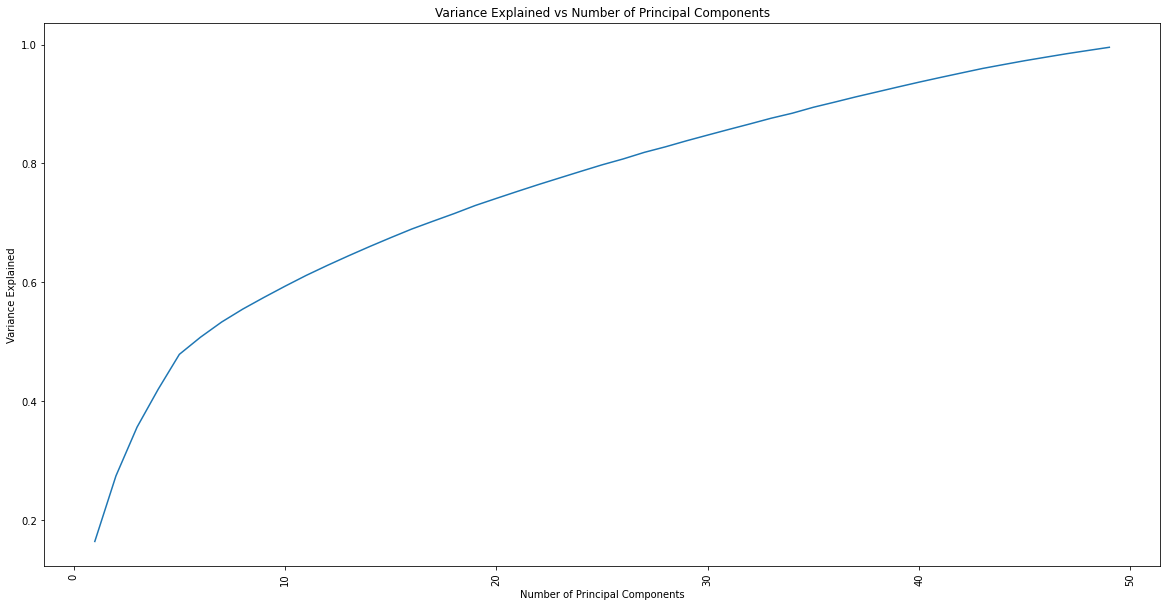

In [21]:
fig, ax = plt.subplots()

graph_data = pca_exp.dropna()
ax.plot(graph_data['pc_count'], graph_data['pc_variance'])

  
# naming the x axis 
#plt.xlabel('Number of Principal Components') 
# naming the y axis 
#plt.ylabel('') 
  
# giving a title to my graph 
#plt.title('Effect of Varying Number of Principal Components on Variance') 

#plt.fig.set_size_inches(20, 10)
# function to show the plot 
#plt.show() 

ax.set_ylabel('Variance Explained')
ax.set_xlabel('Number of Principal Components')

ax.set_title('Variance Explained vs Number of Principal Components')
plt.xticks(rotation=90)

fig.set_size_inches(20, 10)
plt.savefig('/content/drive/My Drive/Data Mining Assignment/graphs/pca_variance vs num pc.png')